### Corrections 


In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

dataset = pd.read_csv('../files/Churn.csv')
dataset.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [151]:
# Check missing values
print(dataset.isnull().sum())
print(dataset.describe().T)
print(dataset.dtypes)

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64
                  count       mean        std    min   25%    50%    75%  \
Senior Citizen   7044.0   0.162124   0.368590   0.00   0.0   0.00   0.00   
tenure           7044.0  32.366695  24.560582   0.00   9.0  29.00  55.00   
Monthly Charges  7044.0  64.756736  30.090786  18.25  35.5  70.35  89.85   

                    max  
Senior Citizen     1.00  
tenure            72.00  
Monthly Charges  118.75  
Customer ID           object
Gender                object
Senior Citizen         int64
Partner 

Churn
No     5175
Yes    1869
Name: count, dtype: int64


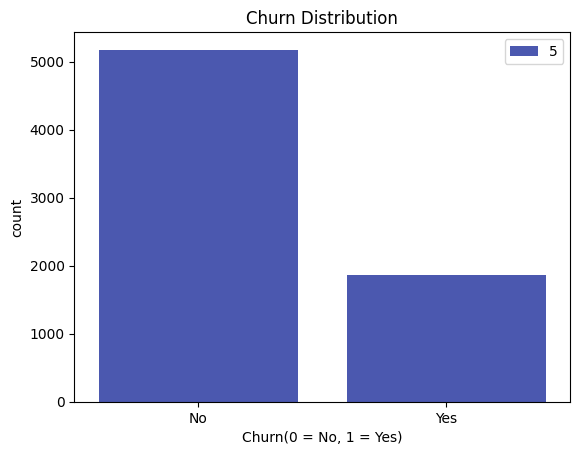

In [152]:
print(dataset['Churn'].value_counts())
sns.countplot(x='Churn', data=dataset, palette='coolwarm', hue=5)
plt.title('Churn Distribution')
plt.xlabel('Churn(0 = No, 1 = Yes)')
plt.ylabel('count')
plt.show()

In [153]:
if 'Total Charges' in dataset.columns:
    dataset['Total Charges'] = pd.to_numeric(dataset['Total Charges'], errors='coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7044 non-null   object 
 1   Gender             7044 non-null   object 
 2   Senior Citizen     7044 non-null   int64  
 3   Partner            7044 non-null   object 
 4   Dependents         7044 non-null   object 
 5   tenure             7044 non-null   int64  
 6   Phone Service      7044 non-null   object 
 7   Multiple Lines     7044 non-null   object 
 8   Internet Service   7044 non-null   object 
 9   Online Security    7044 non-null   object 
 10  Online Backup      7044 non-null   object 
 11  Device Protection  7044 non-null   object 
 12  Tech Support       7044 non-null   object 
 13  Streaming TV       7044 non-null   object 
 14  Streaming Movies   7044 non-null   object 
 15  Contract           7044 non-null   object 
 16  Paperless Billing  7044 

In [154]:
dataset.isnull().sum()

Customer ID           0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
tenure                0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn                 0
dtype: int64

In [155]:
dataset['Total Charges'].fillna(dataset['Total Charges'].median(),inplace=True)
dataset.isnull().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [156]:
# Handling Categorical Variables

# Corrected column names to match the DataFrame
categorial_cols = [
	'Gender', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
	'Internet Service', 'Online Backup', 'Device Protection', 'Paperless Billing',
	'Churn', 'Tech Support', 'Contract', 'Payment Method', 'Streaming TV', 'Streaming Movies'
]

for col in categorial_cols:
	dataset[col] = labelencoder.fit_transform(dataset[col])

In [157]:
x = dataset.drop(['Customer ID','Churn'], axis=1)
y = dataset['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)